In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
import xgboost as xgb
import matplotlib.pyplot as plt
import random

In [58]:
data = pd.read_csv("Datasets/Kaggle.csv")

# Set the index
data.set_index('TEAM', inplace=True)

data["L"] = data['G'] - data["W"]
data.drop(columns=['YEAR', "CONF","BARTHAG", "G", "WAB"], inplace=True)

# Map the 'POSTSEASON' column
postseason_map = {
    "R64": 0, "R68": 0,
    "R32": 1,
    "S16": 2,
    "E8": 4,
    "F4": 8,
    "2ND": 16,
    "Champions": 32
}
data['POSTSEASON'] = data['POSTSEASON'].map(postseason_map)

# Drop rows with NaN values in both X and y
data.dropna(inplace=True)

data.to_csv('clean.csv', index=False)

# Split into features (X) and target (y)
X = data.drop(columns=['POSTSEASON'])
y = data['POSTSEASON']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 42)




In [6]:
url = 'https://www.teamrankings.com/ncaa-basketball/stat/effective-field-goal-pct'
df = pd.read_html(url)[0]
df.to_csv('effective_field_goal_pct.csv', index=False)

url = 'https://www.teamrankings.com/ncaa-basketball/stat/offensive-efficiency'
df = pd.read_html(url)[0]
df.to_csv('offensive_efficiency.csv', index=False)

url = 'https://www.teamrankings.com/ncaa-basketball/stat/defensive-efficiency'
df = pd.read_html(url)[0]
df.to_csv('defensive_efficiency.csv', index=False)

url = 'https://www.teamrankings.com/ncaa-basketball/stat/opponent-effective-field-goal-pct'
df = pd.read_html(url)[0]
df.to_csv('opp_ef_fg.csv', index=False)

url = 'https://www.teamrankings.com/ncaa-basketball/stat/turnovers-per-possession'
df = pd.read_html(url)[0]
df.to_csv('TOR.csv', index=False)

url = 'https://www.teamrankings.com/ncaa-basketball/stat/opponent-turnovers-per-possession'
df = pd.read_html(url)[0]
df.to_csv('TORD.csv', index=False)

url = 'https://www.teamrankings.com/ncaa-basketball/stat/offensive-rebounding-pct'
df = pd.read_html(url)[0]
df.to_csv('ORB.csv', index=False)

url = 'https://www.teamrankings.com/ncaa-basketball/stat/opponent-offensive-rebounding-pct'
df = pd.read_html(url)[0]
df.to_csv('DRB.csv', index=False)

url = 'https://www.teamrankings.com/ncaa-basketball/stat/fta-per-fga'
df = pd.read_html(url)[0]
df.to_csv('FTR.csv', index=False)

url = 'https://www.teamrankings.com/ncaa-basketball/stat/opponent-fta-per-fga'
df = pd.read_html(url)[0]
df.to_csv('FTRD.csv', index=False)

url = 'https://www.teamrankings.com/ncaa-basketball/stat/two-point-pct'
df = pd.read_html(url)[0]
df.to_csv('2P_O.csv', index=False)

url = 'https://www.teamrankings.com/ncaa-basketball/stat/opponent-two-point-pct'
df = pd.read_html(url)[0]
df.to_csv('2P_D.csv', index=False)

url = 'https://www.teamrankings.com/ncaa-basketball/stat/three-point-pct'
df = pd.read_html(url)[0]
df.to_csv('3P_O.csv', index=False)

url = 'https://www.teamrankings.com/ncaa-basketball/stat/opponent-three-point-pct'
df = pd.read_html(url)[0]
df.to_csv('3P_D.csv', index=False)

url = 'https://www.teamrankings.com/ncaa-basketball/stat/possessions-per-game'
df = pd.read_html(url)[0]
df.to_csv('ADJ_T.csv', index=False)

In [60]:
team_colors = {
    "Duke": "#012169",
    "Drake": "#0057B7",
    "High Point": "#582C83",
    "UCSD": "#182B49",
    "Akron": "#041E42",
    "Florida": "#FA4616",
    "VCU": "#F7E400",
    "Houston": "#C8102E",
    "Clemson": "#F56600",
    "McNeese": "#003DA6",
    "St John's": "#C8102E",
    "Liberty": "#002D62",
    "Saint Mary's": "#041E42",
    "Gonzaga": "#041E42",
    "Michigan St": "#18453B",
    "Lipscomb": "#682D63",
    "Norfolk St": "#007A33",
    "Tennessee": "#FF8200",
    "NC Wilmington": "#006666",
    "Texas Tech": "#CC0000",
    "Auburn": "#F26522",
    "Robert Morris": "#041E42",
    "Memphis": "#0033A0",
    "Utah St": "#041E42",
    "Grand Canyon": "#522398",
    "Maryland": "#E03A3E",
    "Wisconsin": "#C5050C",
    "Colorado St": "#006A4D",
    "Purdue": "#CDB87D",
    "Louisville": "#AD0000",
    "Mt St Mary's": "#041E42",
    "Montana": "#542A52",
    "UCLA": "#2774AE",
    "Troy": "#8A181A",
    "Oregon": "#FEE123",
    "Michigan": "#00274C",
    "Iowa St": "#C8102E",
    "American": "#041E42",
    "Oklahoma": "#841617",
    "Bryant": "#B4975A",
    "New Mexico": "#D50032",
    "Marquette": "#003366",
    "UConn": "#041E42",
    "Kentucky": "#0033A0",
    "BYU": "#002E5D",
    "Xavier": "#0C2340",
    "Missouri": "#F1B82D",
    "Creighton": "#006AB6",
    "Yale": "#00356B",
    "SIU Edward": "#041E42",
    "North Carolina": "#7BAFD4",
    "Kansas": "#0051BA",
    "Alabama": "#9E1B32",
    "Mississippi": "#CE1126",
    "Georgia": "#BA0C2F",
    "Arizona": "#CC0033",
    "Baylor": "#154734",
    "San Diego St": "#C41230",
    "Omaha": "#041E42",
    "Vanderbilt": "#866D4B",
    "Arkansas": "#9D2235",
    "Wofford": "#A89968",
    "Alabama St": "#F1C400",
    "St Francis PA": "#C8102E",
    "Texas A&M": "#500000",
    "Mississippi St": "#5E001D",
    "Texas": "#BF5700",
    "Illinois": "#E84A27"
}

def get_team_color(team_name):
    return team_colors.get(team_name, "#{:06x}".format(random.randint(0, 0xFFFFFF)))

In [61]:
espn = pd.read_csv("datasets/ESPN_Team_seed_GWL.csv")

merged_df = pd.merge((espn), pd.read_csv("effective_field_goal_pct.csv")[['Team', '2024']], left_on='TEAM', right_on='Team', how='left')
merged_df['EFG_O'] = merged_df['2024'].str.rstrip('%')
merged_df = merged_df.drop(columns=['Team', '2024'])

merged_df = pd.merge(merged_df, pd.read_csv("offensive_efficiency.csv")[['Team', '2024']], left_on='TEAM', right_on='Team', how='left')
merged_df['ADJOE'] = merged_df['2024']*100
merged_df = merged_df.drop(columns=['Team', '2024'])

merged_df = pd.merge(merged_df, pd.read_csv("defensive_efficiency.csv")[['Team', '2024']], left_on='TEAM', right_on='Team', how='left')
merged_df['ADJDE'] = merged_df['2024']*100
merged_df = merged_df.drop(columns=['Team', '2024'])

merged_df = pd.merge(merged_df, pd.read_csv('opp_ef_fg.csv')[['Team', '2024']], left_on='TEAM', right_on='Team', how='left')
merged_df['EFG_D'] = merged_df['2024'].str.rstrip('%')
merged_df = merged_df.drop(columns=['Team', '2024'])

merged_df = pd.merge(merged_df, pd.read_csv('TOR.csv')[['Team', '2024']], left_on='TEAM', right_on='Team', how='left')
merged_df['TOR'] = merged_df['2024'].str.rstrip('%')
merged_df = merged_df.drop(columns=['Team', '2024'])

merged_df = pd.merge(merged_df, pd.read_csv('TORD.csv')[['Team', '2024']], left_on='TEAM', right_on='Team', how='left')
merged_df['TORD'] = merged_df['2024'].str.rstrip('%')
merged_df = merged_df.drop(columns=['Team', '2024'])

merged_df = pd.merge(merged_df, pd.read_csv('ORB.csv')[['Team', '2024']], left_on='TEAM', right_on='Team', how='left')
merged_df['ORB'] = merged_df['2024'].str.rstrip('%')
merged_df = merged_df.drop(columns=['Team', '2024'])

merged_df = pd.merge(merged_df, pd.read_csv('DRB.csv')[['Team', '2024']], left_on='TEAM', right_on='Team', how='left')
merged_df['DRB'] = merged_df['2024'].str.rstrip('%')
merged_df = merged_df.drop(columns=['Team', '2024'])

merged_df = pd.merge(merged_df, pd.read_csv('FTR.csv')[['Team', '2024']], left_on='TEAM', right_on='Team', how='left')
merged_df['FTR'] = merged_df['2024']*100
merged_df = merged_df.drop(columns=['Team', '2024'])

merged_df = pd.merge(merged_df, pd.read_csv('FTRD.csv')[['Team', '2024']], left_on='TEAM', right_on='Team', how='left')
merged_df['FTRD'] = merged_df['2024']*100
merged_df = merged_df.drop(columns=['Team', '2024'])

merged_df = pd.merge(merged_df, pd.read_csv('2P_O.csv')[['Team', '2024']], left_on='TEAM', right_on='Team', how='left')
merged_df['2P_O'] = merged_df['2024'].str.rstrip('%')
merged_df = merged_df.drop(columns=['Team', '2024'])

merged_df = pd.merge(merged_df, pd.read_csv('2P_D.csv')[['Team', '2024']], left_on='TEAM', right_on='Team', how='left')
merged_df['2P_D'] = merged_df['2024'].str.rstrip('%')
merged_df = merged_df.drop(columns=['Team', '2024'])

merged_df = pd.merge(merged_df, pd.read_csv('3P_O.csv')[['Team', '2024']], left_on='TEAM', right_on='Team', how='left')
merged_df['3P_O'] = merged_df['2024'].str.rstrip('%')
merged_df = merged_df.drop(columns=['Team', '2024'])

merged_df = pd.merge(merged_df, pd.read_csv('3P_D.csv')[['Team', '2024']], left_on='TEAM', right_on='Team', how='left')
merged_df['3P_D'] = merged_df['2024'].str.rstrip('%')
merged_df = merged_df.drop(columns=['Team', '2024'])

merged_df = pd.merge(merged_df, pd.read_csv('ADJ_T.csv')[['Team', '2024']], left_on='TEAM', right_on='Team', how='left')
merged_df['ADJ_T'] = merged_df['2024']
merged_df = merged_df.drop(columns=['Team', '2024'])


teams = merged_df['TEAM']
merged_df = merged_df.apply(pd.to_numeric, errors='coerce')
merged_df.to_csv('merged.csv', index=False)
merged_df.set_index("TEAM", inplace=True)
merged_df.drop(columns=["G"], inplace=True)
merged_df= merged_df[X_train.columns]



In [62]:
Methods = []
MSEs = []
r2s = []

In [63]:
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = np.mean((y_test - y_pred) ** 2)
r2 = model.score(X_test, y_test)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Methods.append("Linear")
MSEs.append(mse)
r2s.append(r2)


model.fit(X, y)

y_pred_linear = model.predict(merged_df)

predicted_df = pd.DataFrame({'Prediction': y_pred_linear}, index=teams)


predicted_df_sorted = predicted_df.sort_values(by='Prediction', ascending=False)
predicted_df_sorted.to_csv("outputs\LinearOutput.csv")



Mean Squared Error: 8.799596059511245
R^2 Score: 0.2230328951545023


In [64]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Methods.append("RF")
MSEs.append( mean_squared_error(y_test, y_pred))
r2s.append(r2_score(y_test, y_pred))

rf_regressor.fit(X, y)
y_pred_linear = rf_regressor.predict(merged_df)

predicted_df = pd.DataFrame({'Prediction': y_pred_linear}, index=teams)


predicted_df_sorted = predicted_df.sort_values(by='Prediction', ascending=False)
predicted_df_sorted.to_csv("outputs\RFOutput.csv")

Mean Squared Error: 6.040391176470589
R-squared: 0.46665901334824267


In [65]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Initialize and train Elastic Net model
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)  # Adjust alpha and l1_ratio as needed
elastic_net.fit(X_train_scaled, y_train)

# Make predictions
y_pred = elastic_net.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Methods.append("ElasticNet")
MSEs.append( mse)
r2s.append(r2)



X_scaled =  scaler.fit_transform(X)
merged_df_scaled = scaler.transform(merged_df)

elastic_net.fit(X_scaled, y)


y_pred_linear = elastic_net.predict(merged_df_scaled)

predicted_df = pd.DataFrame({'Prediction': y_pred_linear}, index=teams)


predicted_df_sorted = predicted_df.sort_values(by='Prediction', ascending=False)
predicted_df_sorted.to_csv("outputs\elasticnetOutput.csv")

Mean Squared Error (MSE): 8.8752
R-squared (R²): 0.2164


In [66]:
xgb_regressor = xgb.XGBRegressor(
    objective="reg:squarederror",  # Use squared error for regression
    n_estimators=100,  # Number of boosting rounds (trees)
    learning_rate=0.1,  # Step size shrinkage
    max_depth=6,  # Maximum depth of trees
    subsample=0.8,  # Fraction of samples used per tree
    colsample_bytree=0.8,  # Fraction of features used per tree
    random_state=42
)

xgb_regressor.fit(X_train, y_train)

# Make predictions
y_pred = xgb_regressor.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Methods.append("XGB")
MSEs.append( mse)
r2s.append(r2)


xgb_regressor.fit(X, y)

y_pred_linear = xgb_regressor.predict(merged_df)

predicted_df = pd.DataFrame({'Prediction': y_pred_linear}, index=teams)


predicted_df_sorted = predicted_df.sort_values(by='Prediction', ascending=False)
predicted_df_sorted.to_csv("outputs\XGB.csv")

Mean Squared Error (MSE): 6.0320
R-squared (R²): 0.4674


In [67]:

df1 = pd.read_csv("outputs\LinearOutput.csv")  
df2 = pd.read_csv("outputs\RFOutput.csv")
df3 = pd.read_csv("outputs\elasticnetOutput.csv")
df4 = pd.read_csv("outputs\XGB.csv")

df1.rename(columns={"Prediction": "Linear"}, inplace=True)
df2.rename(columns={"Prediction": "RF"}, inplace=True)
df3.rename(columns={"Prediction": "EN"}, inplace=True)
df4.rename(columns={"Prediction": "XGB"}, inplace=True)


merged_df = df1.merge(df2, on="TEAM", how="outer") \
               .merge(df3, on="TEAM", how="outer") \
               .merge(df4, on="TEAM", how="outer")



merged_df["mean"] = merged_df.drop(columns=["TEAM"]).mean(axis=1) 
merged_df= merged_df.sort_values(by="mean", ascending=False)


merged_df.to_csv("outputs\mean_predictions.csv", index=False)


merged_df["XGBRF"] =  merged_df.drop(columns=["TEAM", "Linear", "EN"]).mean(axis=1) 
merged_df= merged_df.sort_values(by="XGBRF", ascending=False)

merged_df.to_csv("outputs\XGBRF.csv", index=False)

# Sort the DataFrame by 'mean' in descending order
merged_df = merged_df.sort_values(by="mean", ascending=False)

merged_df['ranking'] = merged_df['mean'].rank(method='min', ascending=False).astype(int)

merged_df["color"] = merged_df["TEAM"].apply(get_team_color)

merged_df.to_csv("outputs\Final_sort_mean.csv", index=False)



In [68]:

print(Methods)
print(MSEs)
print(r2s)


['Linear', 'RF', 'ElasticNet', 'XGB']
[8.799596059511245, 6.040391176470589, 8.875249064189186, 6.031991559304389]
[0.2230328951545023, 0.46665901334824267, 0.2163530548959317, 0.467400664008943]


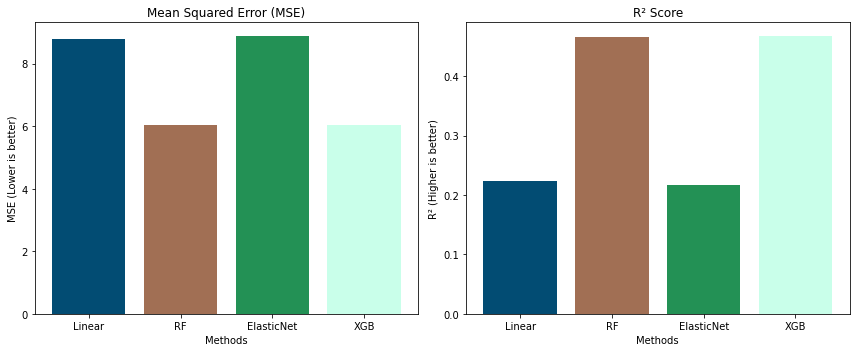

In [69]:
colors = {method: "#{:06x}".format(np.random.randint(0, 0xFFFFFF)) for method in Methods}

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot for MSEs
ax[0].bar(Methods, MSEs, color=[colors[m] for m in Methods])
ax[0].set_title("Mean Squared Error (MSE)")
ax[0].set_ylabel("MSE (Lower is better)")
ax[0].set_xlabel("Methods")

# Bar plot for R² Scores
ax[1].bar(Methods, r2s, color=[colors[m] for m in Methods])
ax[1].set_title("R² Score")
ax[1].set_ylabel("R² (Higher is better)")
ax[1].set_xlabel("Methods")

# Save the plots
plt.savefig('plots/modelscores.png', bbox_inches='tight', transparent=False, facecolor='white')

plt.tight_layout()
plt.show()

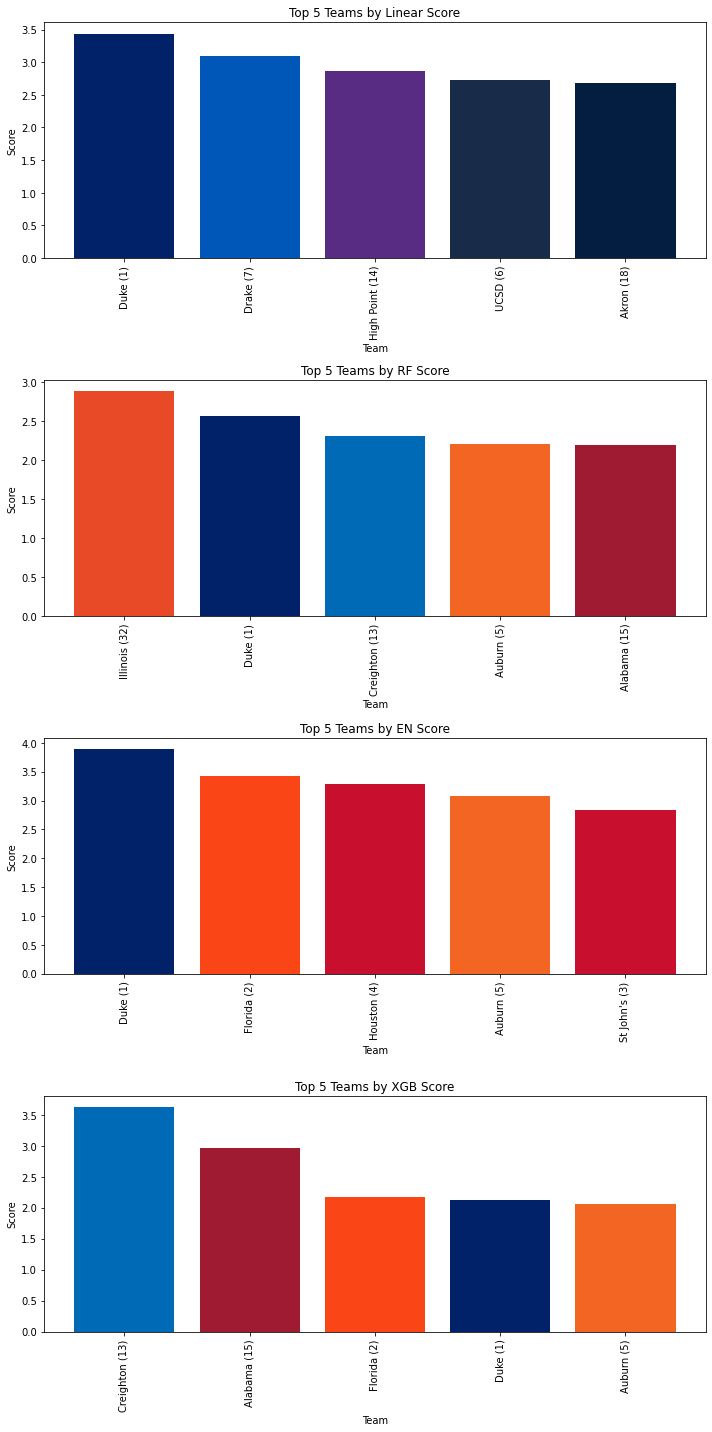

In [70]:
df = pd.read_csv('outputs\\Final_sort_mean.csv')

models = ['Linear', 'RF', 'EN', 'XGB']

# Create a figure with subplots for each model
fig, axs = plt.subplots(len(models), figsize=(10, 20))

# Loop through each model
for i, model in enumerate(models):
    # Sort the DataFrame by the current model's ranking
    top_teams = df.sort_values(by=model, ascending=False).head(5)
    
    # Create labels with rankings
    labels = [f"{team} ({rank})" for team, rank in zip(top_teams['TEAM'], top_teams['ranking'])]
    
    # Get colors from the dataset
    colors = top_teams['color']  # Assuming the column name is 'color'
    
    # Plot the top teams for this model
    axs[i].bar(labels, top_teams[model], color=colors)
    axs[i].set_title(f'Top 5 Teams by {model} Score')
    axs[i].set_xlabel('Team')
    axs[i].set_ylabel('Score')
    axs[i].tick_params(axis='x', rotation=90)  # Rotate team names for better readability

# Layout so plots do not overlap
fig.tight_layout()

# Save the plot
plt.savefig('plots/top_teams_by_model_with_rankings.png', transparent=False, facecolor='white')

plt.show()

In [71]:
models = ['Linear', 'RF', 'EN', 'XGB']

# Initialize a dictionary to store occurrences of each team
team_occurrences = {}

# Loop through each model
for model in models:
    # Sort the DataFrame by the current model's ranking
    top_10_teams = pd.read_csv('outputs\Final_sort_mean.csv').sort_values(by=model, ascending = False).head(10)['TEAM'].tolist()
    
    # Update occurrences for each team in this model
    for team in top_10_teams:
        if team in team_occurrences:
            team_occurrences[team] += 1
        else:
            team_occurrences[team] = 1

# Print occurrences for each team
for team, occurrences in team_occurrences.items():
    print(f"{team}: {occurrences} occurrences in top 10 across models")

Duke: 4 occurrences in top 10 across models
Drake: 1 occurrences in top 10 across models
High Point: 2 occurrences in top 10 across models
UCSD: 3 occurrences in top 10 across models
Akron: 1 occurrences in top 10 across models
VCU: 1 occurrences in top 10 across models
Florida: 4 occurrences in top 10 across models
Houston: 3 occurrences in top 10 across models
Clemson: 1 occurrences in top 10 across models
McNeese: 1 occurrences in top 10 across models
Illinois: 2 occurrences in top 10 across models
Creighton: 2 occurrences in top 10 across models
Auburn: 3 occurrences in top 10 across models
Alabama: 2 occurrences in top 10 across models
St John's: 3 occurrences in top 10 across models
Michigan St: 3 occurrences in top 10 across models
Kentucky: 1 occurrences in top 10 across models
Tennessee: 2 occurrences in top 10 across models
Saint Mary's: 1 occurrences in top 10 across models


In [72]:
df = pd.read_csv('outputs\Final_sort_mean.csv')

df['ranking'] = df['mean'].rank(method='min', ascending=False).astype(int)

df['range'] = df[['Linear', 'RF', 'EN', 'XGB',]].max(axis=1) - df[['Linear', 'RF', 'EN', 'XGB']].min(axis=1)

highest_range_teams = df.nlargest(5, 'range')

# Get the top 5 teams with the lowest range
lowest_range_teams = df.nsmallest(5, 'range')

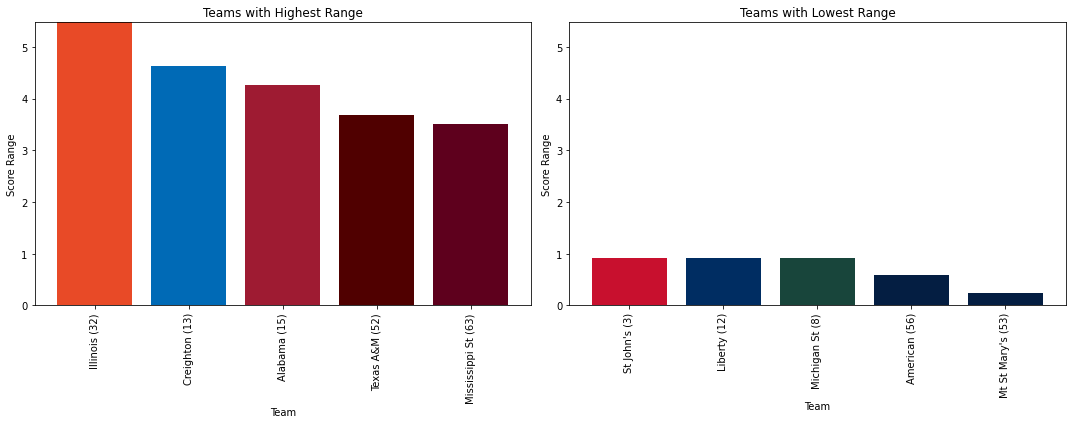

In [73]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Determine the global range for y-axis limits
max_range = max(highest_range_teams['range'].max(), lowest_range_teams['range'].max())

# Plot the teams with the highest range, using their team colors
axs[0].bar([f"{team} ({rank})" for team, rank in zip(highest_range_teams['TEAM'], highest_range_teams['ranking'])],
           highest_range_teams['range'], color=[team_colors.get(team, "gray") for team in highest_range_teams['TEAM']])
axs[0].set_title('Teams with Highest Range')
axs[0].set_xlabel('Team')
axs[0].set_ylabel('Score Range')
axs[0].tick_params(axis='x', rotation=90)
axs[0].set_ylim(0, max_range)  # Set the same y-axis scale

# Reverse order for lowest range teams
lowest_range_teams_sorted = lowest_range_teams.sort_values(by="range", ascending=False)

# Plot the teams with the lowest range, now in descending order
axs[1].bar([f"{team} ({rank})" for team, rank in zip(lowest_range_teams_sorted['TEAM'], lowest_range_teams_sorted['ranking'])],
           lowest_range_teams_sorted['range'], color=[team_colors.get(team, "gray") for team in lowest_range_teams_sorted['TEAM']])
axs[1].set_title('Teams with Lowest Range')
axs[1].set_xlabel('Team')
axs[1].set_ylabel('Score Range')
axs[1].tick_params(axis='x', rotation=90)
axs[1].set_ylim(0, max_range)  # Set the same y-axis scale

# Layout so plots do not overlap
fig.tight_layout()

# Save the plot with a white background
plt.savefig('plots/range_of_teams_with_rankings.png', facecolor='white', transparent=False, bbox_inches='tight')

plt.show()


In [78]:
updated2025 = df[["TEAM", "mean", "ranking"]]
updated2025['2025score'] = pd.NA

updated2025.loc[updated2025['TEAM'] == 'San Diego St', '2025score'] = 0
updated2025.loc[updated2025['TEAM'] == 'St Francis PA', '2025score'] = 0
updated2025.loc[updated2025['TEAM'] == 'American', '2025score'] = 0
updated2025.loc[updated2025['TEAM'] == 'Texas', '2025score'] = 0
Texas


C:\Users\Tyler\AppData\Local\Temp\ipykernel_27268\1995820538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated2025['2025score'] = pd.NA


NameError: name 'Texas' is not defined

In [79]:
updated2025

,TEAM,mean,ranking,2025score
0,Duke,3.003871,1,<NA>
1,Florida,2.509822,2,<NA>
2,St John's,2.257573,3,<NA>
3,Houston,2.230308,4,<NA>
4,Auburn,2.159836,5,<NA>
5,UCSD,2.069749,6,<NA>
6,Drake,1.955088,7,<NA>
7,Michigan St,1.920023,8,<NA>
8,Tennessee,1.842480,9,<NA>
9,VCU,1.692635,10,<NA>
